# GAN1_1022
by Tuege Neumann
Created: 18.10.2022

Simple GAN network with variable internal structure for testing

## Imports
### Improvements
1. cashed yfinance sessions
2. threaded historic data retrieval
3. create dictionary for loading more than 1 stock ticker

In [502]:
import datetime

import numpy as np
import pandas as pd
import yfinance as yf
#from stock_indicators import indicators
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import

In [2]:
import yfinance as yf

historicalTickerData = []
stockTickers = ["SPY",
                "AAPL",
                "MSFT",
                "JPM",
                "MS",
                "GS",
                "EUR"]

for ticker_name in stockTickers:
    ticker_object = yf.Ticker(ticker_name)
    historicalTickerData.append(ticker_object.history(start = "2016-01-01", end = "2021-01-01", interval = '1d', threads = True))

MSFT = historicalTickerData[6]
#df = yf.download(stockTickers, start="2017-01-01", end="2017-04-30", threads = True)#, group_by="ticker")
#close = df["Close"][stockTickers[:]]
#GS = df[:]["GS"]

In [ ]:
MSFT.loc[MSFT.index.array[0]]
#MSFT.iloc[0]
#Series^^ --> Timestamp

In [433]:
#proper way to do it
#MSFT.loc[pd.to_datetime([MSFT.index.array[0]])]

#MSFT.index.array[0].to_pydatetime()
#Datetime^^

data = []
for n in MSFT.loc[pd.to_datetime([MSFT.index.array[0]])].values[0]:
    data.append(n)
data.insert(0, MSFT.index.array[0].to_pydatetime())
data

#Outputs a list of stats from a specific date with date in from Datetime

[datetime.datetime(2016, 1, 4, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>),
 48.83759937049612,
 49.2691535949707,
 48.001461988799086,
 49.2691535949707,
 53778000.0,
 0.0,
 0.0]

## Data Formatting

## Technical Indicator Generation

In [3]:
from stockstats import StockDataFrame

#GS = df[:][stockTickers[5]]
stock = StockDataFrame.retype(MSFT)

In [4]:
#Initialisation

#stock[["close_10_sma", "close_50_sma"]]
stock.init_all()

In [5]:
stock

,open,high,low,close,volume,dividends,stock splits,change,rs_14,rsi,...,vwma,chop,log-ret,mfi,wt1,wt2,wr,supertrend_ub,supertrend_lb,supertrend
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-29 00:00:00-05:00,0.06,0.08,0.06,0.07,64032,0,0,0.0,NaN,NaN,...,0.07,0.0,0.0,0.5,NaN,NaN,-49.999991,0.130000,0.010000,0.130000
2018-11-30 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0,0,0.0,NaN,NaN,...,0.07,0.0,0.0,0.5,121.212121,121.212121,-49.999991,0.098889,0.041111,0.098889
2018-12-03 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0,0,0.0,NaN,NaN,...,0.07,0.0,0.0,0.5,94.401653,107.806887,-49.999991,0.088537,0.051463,0.088537
2018-12-04 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0,0,0.0,NaN,NaN,...,0.07,0.0,0.0,0.5,78.910288,98.174688,-49.999991,0.083376,0.056624,0.083376
2018-12-06 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0,0,0.0,NaN,NaN,...,0.07,0.0,0.0,0.5,68.468944,90.748252,-49.999991,0.080290,0.059710,0.080290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 00:00:00-05:00,0.06,0.06,0.06,0.06,0,0,0,0.0,2.800424e-11,2.800419e-09,...,NaN,NaN,0.0,0.0,-5.009194,-5.120053,NaN,0.060021,0.059979,0.060021
2020-11-03 00:00:00-05:00,0.06,0.06,0.06,0.06,0,0,0,0.0,2.800424e-11,2.800419e-09,...,NaN,NaN,0.0,0.0,-4.938842,-5.046479,NaN,0.060020,0.059980,0.060020
2020-11-04 00:00:00-05:00,0.06,0.06,0.06,0.06,0,0,0,0.0,2.800424e-11,2.800419e-09,...,NaN,NaN,0.0,0.0,-4.870489,-4.975039,NaN,0.060018,0.059982,0.060018


Text(0.5, 1.0, 'Indicators')

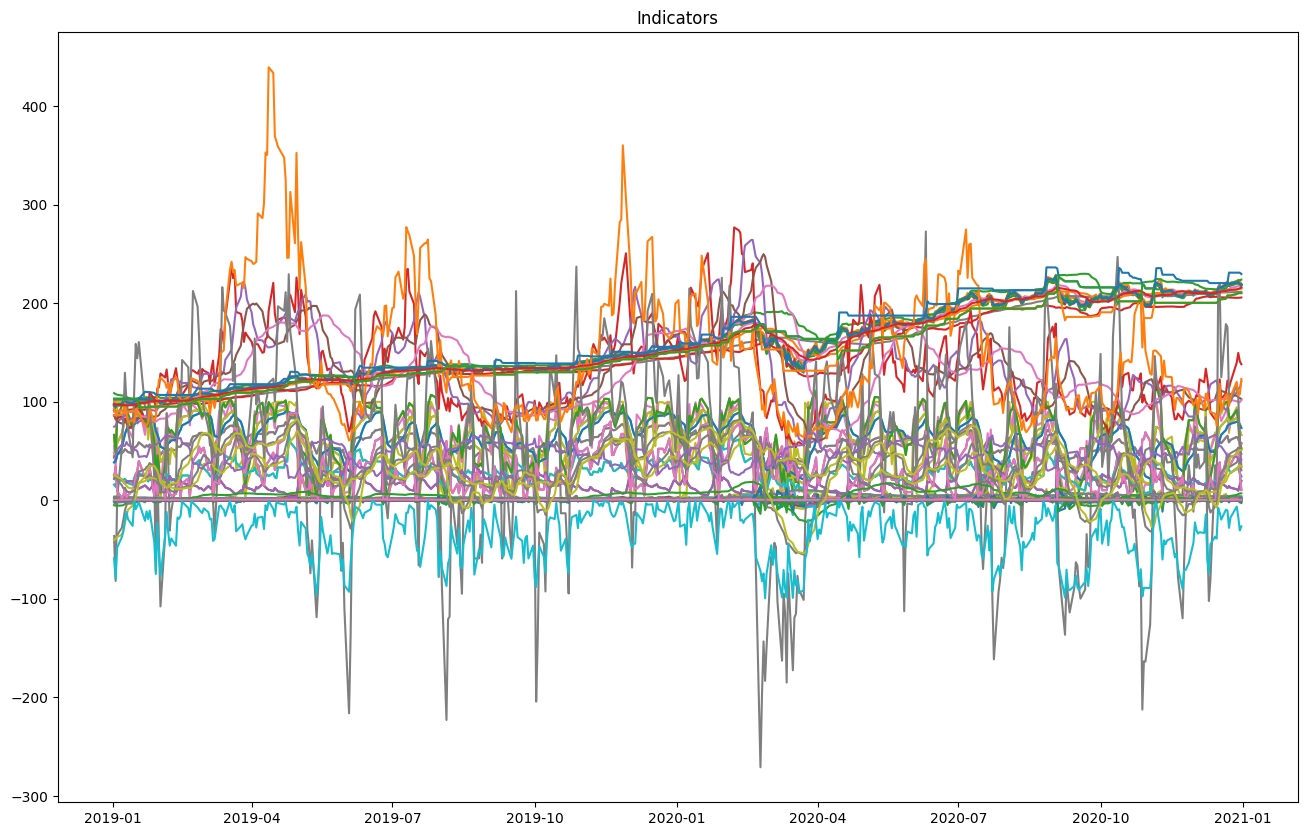

In [451]:
#stock_df.loc["2020-06-01":, ["close", "close_10_sma", "close_50_sma"]].plot(title="SMA example");

plt.figure(figsize=(16, 10), dpi=100)
#plt.plot(stock.loc["2019-06-01":, ["close", "close_10_sma", "close_50_sma", "boll_ub", "boll_lb"]]);
plt.plot(stock.loc["2019-01-01":, ['open',
                                   'high',
                                   'low',
                                   'close',
                                   'volume',
                                   'dividends',
                                   'stock splits',
                                   'close_10_sma',
                                   'close_50_sma',
                                   'macd',
                                   'macds',
                                   'macdh',
                                   'boll',
                                   'boll_ub',
                                   'boll_lb',
                                   'change',
                                   'rs_14',
                                   'rsi',
                                   'rsi_14',
                                   'stochrsi',
                                   'rate',
                                   'middle',
                                   'tp',
                                   'tp',
                                   'ppo',
                                   'ppos',
                                   'ppoh',
                                   'rsv_9',
                                   'kdjk_9',
                                   'kdjk',
                                   'kdjd_9',
                                   'kdjd',
                                   'kdjj_9',
                                   'kdjj',
                                   'cr',
                                   'cr-ma1',
                                   'cr-ma2',
                                   'cr-ma3',
                                   'cci',
                                   'tr',
                                   'atr',
                                   'high_delta',
                                   'um',
                                   'low_delta',
                                   'dm',
                                   'pdm',
                                   'pdm_14_ema',
                                   'pdm_14',
                                   'atr_14',
                                   'pdi_14',
                                   'pdi',
                                   'mdm',
                                   'mdm_14_ema',
                                   'mdm_14',
                                   'mdi_14',
                                   'mdi',
                                   'dx_14',
                                   'dx',
                                   'adx',
                                   'adxr',
                                   'trix',
                                   'tema',
                                   'vr',
                                   'dma',
                                   'vwma',
                                   'chop',
                                   'log-ret',
                                   'mfi',
                                   'wt1',
                                   'wt2',
                                   'wr',
                                   'supertrend_ub',
                                   'supertrend_lb',
                                   'supertrend']])
#plt.fill_between(list(stock.index), stock.loc["2019-06-01":, ["boll_lb"]], stock.loc["2019-06-01":, ["boll_ub"]], alpha=0.35)
plt.title("Indicators")

## Correlated Asset Import

## Global Indicies Import

In [579]:
for asset_ticker in ['JPM', 'MS', '^GSPC', '^DJI', '^IXIC', '^RUT', '^FTSE', '^N225', '^NYA', '^HSI', '^BSESN', '^VIX', 'EURUSD=X', 'GBPUSD=X', 'JPY=X', '^TNX']:#, 'BTC-USD', '^CMC200']:
 asset_obj = yf.Ticker(asset_ticker)
 ASSET = yf.download(asset_ticker, start = "2016-01-01", end = "2021-01-01", interval = '1d')
 ASSET_Close = ASSET[['Close']]
 asset = ASSET_Close.rename(columns={"Close": asset_ticker})
 asset = StockDataFrame.retype(asset)

 new_index = []
 for row in asset.index:
        row = row.tz_convert('America/New_York')
        row = row.replace(hour=0, minute=0, second=0)
        new_index.append(row)
 asset.index = pd.DatetimeIndex(data = new_index)

 print(asset)
 stock = pd.concat([stock, asset], axis=1)
stock


[*********************100%***********************]  1 of 1 completed
                                  jpm
2016-01-04 00:00:00-05:00   63.619999
2016-01-05 00:00:00-05:00   63.730000
2016-01-06 00:00:00-05:00   62.810001
2016-01-07 00:00:00-05:00   60.270000
2016-01-08 00:00:00-05:00   58.919998
...                               ...
2020-12-24 00:00:00-05:00  124.519997
2020-12-28 00:00:00-05:00  125.339996
2020-12-29 00:00:00-05:00  125.010002
2020-12-30 00:00:00-05:00  125.360001
2020-12-31 00:00:00-05:00  127.070000

[1259 rows x 1 columns]
[*********************100%***********************]  1 of 1 completed
                                  ms
2016-01-04 00:00:00-05:00  31.480000
2016-01-05 00:00:00-05:00  31.280001
2016-01-06 00:00:00-05:00  30.500000
2016-01-07 00:00:00-05:00  28.980000
2016-01-08 00:00:00-05:00  28.379999
...                              ...
2020-12-24 00:00:00-05:00  68.089996
2020-12-28 00:00:00-05:00  68.050003
2020-12-29 00:00:00-05:00  67.709999
2020-12-30 

,open,high,low,close,volume,dividends,stock splits,change,rs_14,rsi,rsi_14,stochrsi,rate,middle,tp,boll,boll_ub,boll_lb,macd,macds,macdh,ppo,ppos,ppoh,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,cr,cr-ma1,cr-ma2,cr-ma3,cci,tr,atr,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,adx,adxr,trix,tema,vr,close_10_sma,close_50_sma,dma,vwma,chop,log-ret,mfi,wt1,wt2,wr,supertrend_ub,supertrend_lb,supertrend,jpm,ms,^gspc,^dji,^ixic,^rut,^ftse,^n225,^nya,^hsi,^bsesn,^vix,eurusd=x,gbpusd=x,jpy=x,^tnx
2015-12-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.085906,1.473839,120.288002,NaN
2016-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6093.399902,18450.980469,NaN,21327.119141,25623.349609,NaN,1.085399,1.473709,120.310997,NaN
2016-01-04 00:00:00-05:00,48.837603,49.269157,48.001466,49.269157,53778000.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,48.846594,48.846594,49.269157,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,66.666667,66.666667,55.555556,55.555556,88.888889,88.888889,50.000000,50.000000,50.000000,50.000000,NaN,1.267692,1.267692,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.267692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,49.269157,100.000000,49.269157,49.269157,0.000000,48.846594,0.000000,0.000000,0.500000,NaN,NaN,-0.000000,52.438387,44.832236,52.438387,63.619999,31.480000,2012.660034,17148.939453,4903.089844,1108.619995,6137.200195,18374.000000,10001.559570,21188.720703,25580.339844,20.700001,1.082755,1.471410,119.467003,2.245
2016-01-05 00:00:00-05:00,49.386032,49.799604,49.035394,49.493919,34079700.0,0.0,0.0,0.456192,inf,100.000000,100.000000,NaN,0.456192,49.442973,49.442973,49.381538,49.699400,49.063677,0.005043,0.002802,0.002241,0.010211,0.005673,0.004538,82.999936,72.111090,72.111090,61.074067,61.074067,94.185136,94.185136,162.765255,50.000000,50.000000,50.000000,66.666667,0.764210,1.006627,0.530447,0.530447,1.033928,0.000000,0.530447,0.284168,0.284168,1.006627,28.229703,28.229703,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.072501,49.479535,226.742162,49.381538,49.381538,0.000000,49.077927,4.631209,0.004552,0.500000,121.212121,121.212121,-17.000064,52.437380,46.397618,52.437380,63.730000,31.280001,2016.709961,17158.660156,4891.430176,1110.439941,6073.399902,18191.320312,10028.059570,20980.810547,25406.330078,19.340000,1.075199,1.467394,119.101997,2.248
2016-01-06 00:00:00-05:00,48.837602,48.909530,48.226233,48.594852,39518900.0,0.0,0.0,-1.816520,0.232138,18.840255,18.840255,0.000000,-1.816520,48.576872,48.576872,49.119310,50.055090,48.183530,-0.021455,-0.007139,-0.014315,-0.043694,-0.014560,-0.029135,33.000061,59.074080,59.074080,60.407405,60.407405,56.407431,56.407431,66.714982,50.000000,50.000000,50.000000,-77.664154,1.267686,1.100169,-0.890074,0.000000,-0.809161,0.809161,0.000000,0.175615,0.175615,1.100169,15.962520,15.962520,0.809161,0.309102,0.309102,28.095883,28.095883,27.539271,27.539271,57.731241,75.343224,-0.054828,48.739122,91.809408,49.119310,49.119310,0.000000,48.922473,23.002371,-0.018332,0.500000,3.907740,62.559931,-66.999939,51.868389,46.397618,51.868389,62.810001,30.500000,1990.260010,16906.509766,4835.759766,1094.369995,5954.100098,17767.339844,9868.259766,20333.339844,24851.830078,20.590000,1.077900,1.462994,118.610001,2.177
...,...,...,...,...,

In [573]:
new_index = []
for row in asset.index:
    row = row.tz_convert('America/New_York')
    row = row.replace(hour=9)
    new_index.append(row)

asset.index = pd.DatetimeIndex(data = new_index)
#print(asset.index)

DatetimeIndex(['2016-01-04 09:00:00-05:00', '2016-01-05 09:00:00-05:00',
               '2016-01-06 09:00:00-05:00', '2016-01-07 09:00:00-05:00',
               '2016-01-08 09:00:00-05:00', '2016-01-11 09:00:00-05:00',
               '2016-01-12 09:00:00-05:00', '2016-01-13 09:00:00-05:00',
               '2016-01-14 09:00:00-05:00', '2016-01-15 09:00:00-05:00',
               ...
               '2020-12-17 09:00:00-05:00', '2020-12-18 09:00:00-05:00',
               '2020-12-21 09:00:00-05:00', '2020-12-22 09:00:00-05:00',
               '2020-12-23 09:00:00-05:00', '2020-12-24 09:00:00-05:00',
               '2020-12-28 09:00:00-05:00', '2020-12-29 09:00:00-05:00',
               '2020-12-30 09:00:00-05:00', '2020-12-31 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', length=1259, freq=None)


    ## GAN Setup

## Feature Selection

## Fourier

$$G(f) = \int_{-\infty}^\infty g(t) e^{-i 2 \pi f t} dt$$

## Training

## Testing

## Analysis/Performance Evaluation